# Step1 正規分布

## 1.2.2 正規分布のコード

In [1]:
import numpy as np

def normal(x, mu=0, sigma=1):
    y = 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y

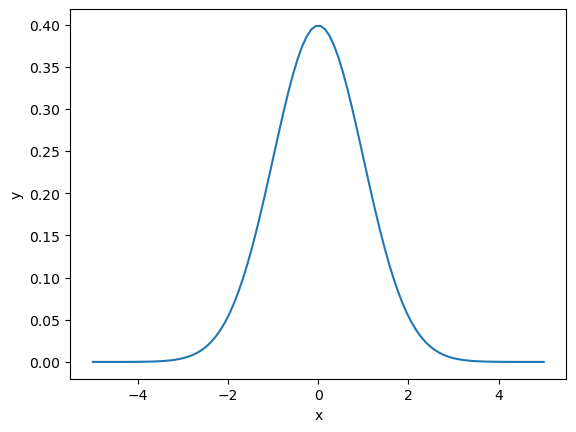

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100) 
# 第一引数 start に最初の値，第二引数 stop に最後の値，第三引数 num に要素数を指定する
# 初項が第一引数，末項が第二引数で項数が第三引数の等差数列の list が生成される
y = normal(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 1.2.3 パラメータの役割

### &mu; のみ変化させた時
 山の形はどれも同じだが，確率密度が最大値となる位置が異なる．

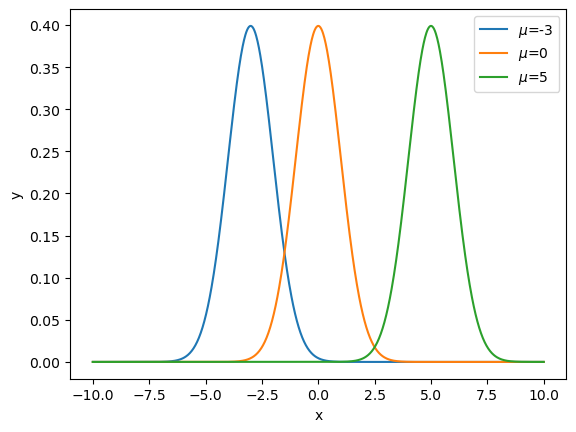

In [3]:
x = np.linspace(-10, 10, 1000)

y0 = normal(x, mu=-3)
y1 = normal(x, mu=0)
y2 = normal(x, mu=5)

plt.plot(x, y0, label='$\mu$=-3')
plt.plot(x, y1, label='$\mu$=0')
plt.plot(x, y2, label='$\mu$=5')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### &sigma; のみ変化させた時
 平均は変わらないが，山の形が変化する．&sigma; の値が小さいほど，幅が狭く高い山が，&sigma; の値が大きいほど，幅が広く低い山ができる．

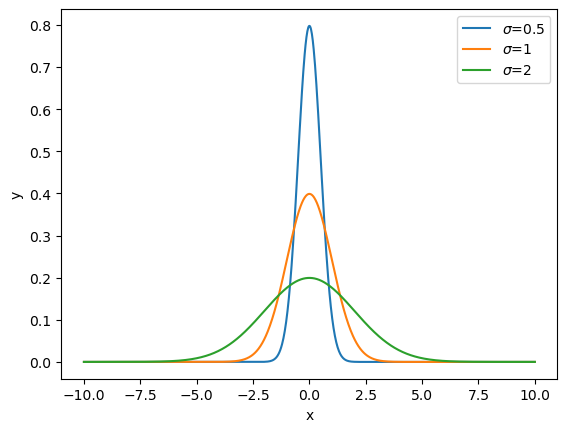

In [4]:
y0 = normal(x, sigma=0.5)
y1 = normal(x, sigma=1)
y2 = normal(x, sigma=2)

plt.plot(x, y0, label='$\sigma$=0.5')
plt.plot(x, y1, label='$\sigma$=1')
plt.plot(x, y2, label='$\sigma$=2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 1.3 中心極限定理
### 1.3.1 中心極限定理とは
平均が &mu; ，分散が $\sigma^2$ であるなんらかの確率分布 $p(x)$ から $N$ 点をサンプリングしたサンプル平均を以下のように定義する．
$$\bar{x} = \sum^{N}_{i=0}{x_i}$$
この平均 $\bar{x}$ の分布は $N$ が大きくなると**平均が &mu; ，分散が $\sigma^2/N$ の正規分布に近づく．**

### 1.3.2 中心極限定理の実験
サンプル数を増やせば増やすほど，分散の小さい正規分布になっている．

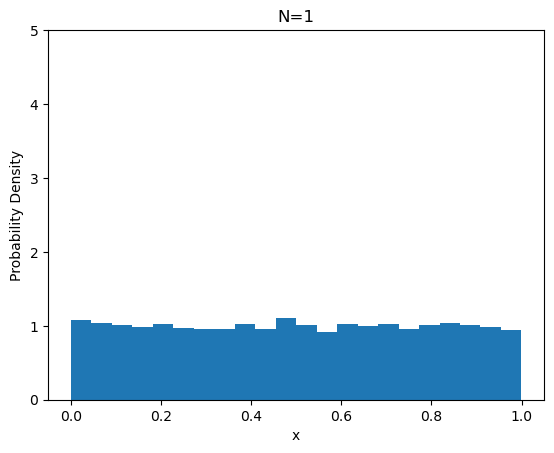

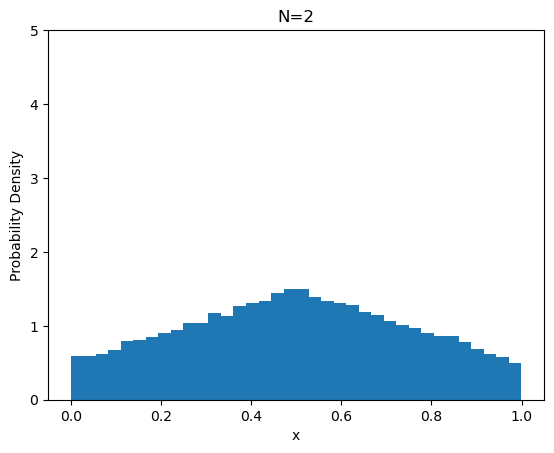

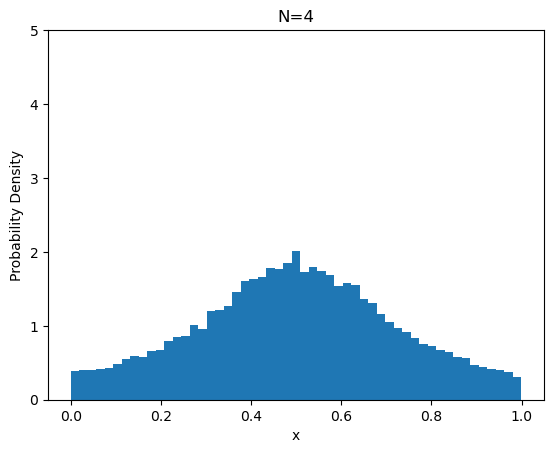

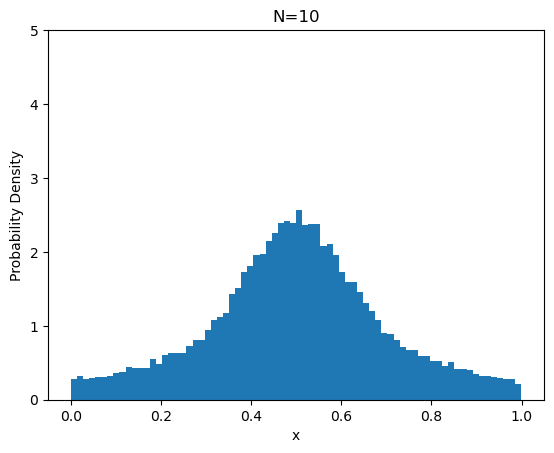

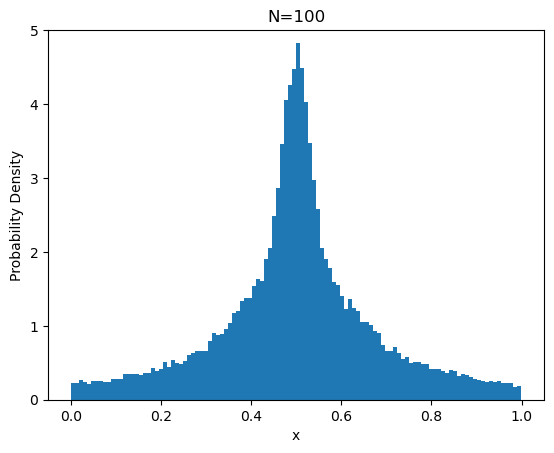

In [5]:
x_mean = []
N = [1, 2, 4, 10, 100] # サンプルサイズ

for i in range(5):
    for _ in range(10000):
        xs = []
        for n in range(N[i]):
            x = np.random.rand() # 一様分布からの乱数 0以上1未満の値が出力される．
            xs.append(x)
        mean = np.mean(xs)
        x_mean.append(mean)

    # グラフの描画
    plt.hist(x_mean, bins='auto', density=True)
    plt.title(f'N={N[i]}')
    plt.xlabel('x')
    plt.ylabel('Probability Density') # 確率分布
    plt.xlim(-0.05, 1.05)
    plt.ylim(0, 5)
    plt.show()

# 1.4 サンプル和の確率分布

## 1.4.1 サンプル和の期待値と分散

## 1.4.2 コードで確かめる

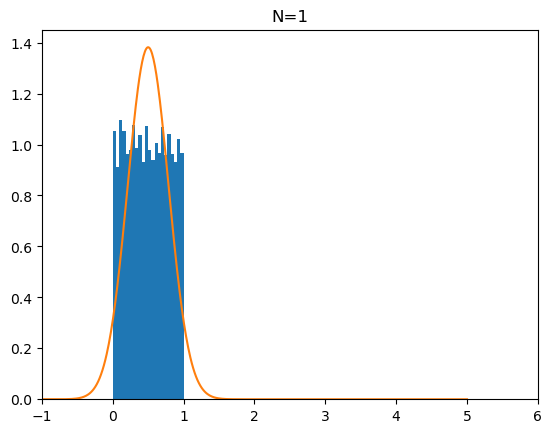

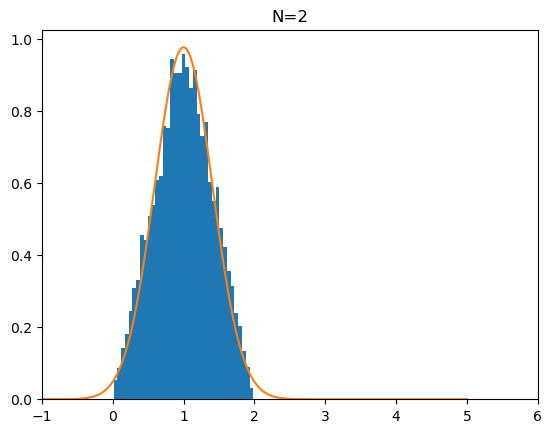

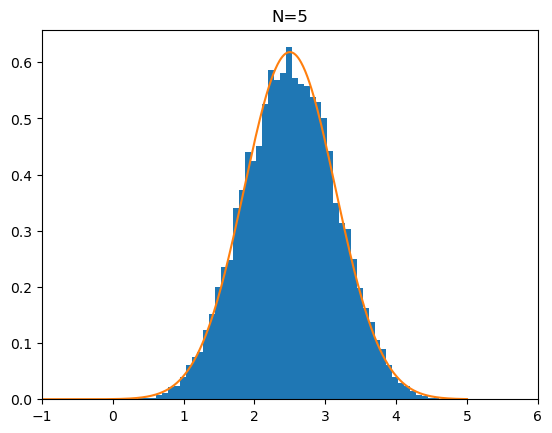

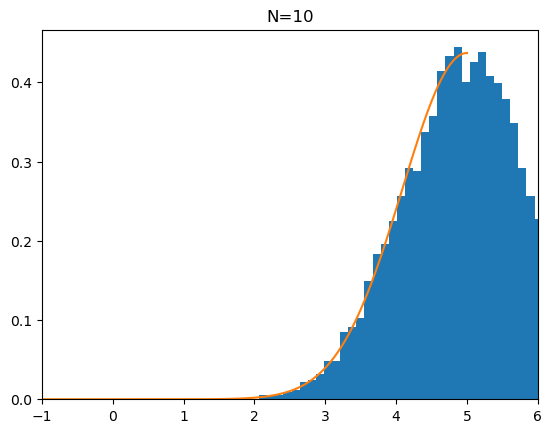

In [11]:
N = [1, 2, 5, 10]

for i in range(4):
    x_sums = []
    for _ in range(10000):
        xs = []
        for n in range(N[i]):
            x = np.random.rand() # 一様分布からの乱数
            xs.append(x)
        t = np.sum(xs) # 和を求める
        x_sums.append(t)

    x_norm = np.linspace(-5, 5, 1000)
    mu = N[i] / 2
    sigma = np.sqrt(N[i] / 12)
    y_norm = normal(x_norm, mu, sigma)

    plt.hist(x_sums, bins='auto', density=True)
    plt.plot(x_norm, y_norm)
    plt.title(f'N={N[i]}')
    plt.xlim(-1, 6)
    plt.show()
